In [80]:
import tarfile
import h5py 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import io
from urllib.request import urlopen
import pydub
import random
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA
import xgboost as kgb
import lightgbm as lgbm
import seaborn as sns
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, HighPassFilter, AddBackgroundNoise, ApplyImpulseResponse, ClippingDistortion, LoudnessNormalization, Reverse, TimeMask, TanhDistortion, RoomSimulator 
import IPython.display as ipd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import classification_report
sample_rate=22050
mapping = {'Hip hop':0, 'EDM':1, 'Pop':2, 'Metal':3, 'Blues':4}

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = '3113ea2cb1de4ed1aeb8acb64a85d3c4'
secret = '9829c5d54a05449d8393c9e25e7bb601'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
#dir(sp)

In [4]:
genre = pd.read_csv('genresongs.csv')
genre = genre.iloc[:,1:]

In [5]:
pop = pd.read_csv('popular.csv')
pop = pop.iloc[:,1:]

# Trying with Neural Nets

## Neural Net

### Multi-Layer Perceptron

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    
    #keras.layers.Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    #keras.layers.Dropout(0.1),
    
    keras.layers.Dense(64 ,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(100 ,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(5,activation="softmax"),
                            ])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [70]:
model.fit(x_train_3d,pd.Series(zcr_y_train).map(mapping),validation_data=(x_val_3d,pd.Series(zcr_y_val).map(mapping)),epochs=100,batch_size=32)
model.evaluate(x_test_3d,pd.Series(zcr_y_test).map(mapping),verbose=1)

Epoch 1/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9878 - accuracy: 0.6154 - val_loss: 1.3694 - val_accuracy: 0.4412
Epoch 2/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9909 - accuracy: 0.6162 - val_loss: 1.3606 - val_accuracy: 0.4487
Epoch 3/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9819 - accuracy: 0.6222 - val_loss: 1.3593 - val_accuracy: 0.4530
Epoch 4/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9673 - accuracy: 0.6270 - val_loss: 1.3536 - val_accuracy: 0.4479
Epoch 5/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9660 - accuracy: 0.6234 - val_loss: 1.3703 - val_accuracy: 0.4463
Epoch 6/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9617 - accuracy: 0.6271 - val_loss: 1.3753 - val_accuracy: 0.4493
Epoch 7/100
474/474 [==============================] - 5s 11ms/step - loss: 0.9584 - accuracy: 0.6315 - val_loss: 1.3730 - val_accuracy:

KeyboardInterrupt: 

In [28]:
model.evaluate(x_test_3d,pd.Series(zcr_y_test).map(mapping),verbose=1)
model.save(r'augmented_data/keras_models/mlp_15k_chromastft')

9/9 [==============================] - 0s 1ms/step - loss: 1.7921 - accuracy: 0.3589
INFO:tensorflow:Assets written to: augmented_data/keras_models/mlp_15k_zcr\assets


INFO:tensorflow:Assets written to: augmented_data/keras_models/mlp_15k_zcr\assets


In [48]:
confusion_matrix(pd.Series(zcr_y_test).map(mapping), np.argmax(model.predict(x_test_3d)[:,0,:],axis=1))

array([[17,  9, 19,  0,  6],
       [ 3, 16, 22,  9, 14],
       [ 5, 22, 24,  1, 11],
       [ 2,  9,  6, 23, 15],
       [ 3,  8, 11,  9, 23]], dtype=int64)

array([3, 2, 2, 3, 2, 4, 1, 4, 1, 4, 1, 1, 3, 1, 1, 2, 3, 4, 4, 1, 2, 2,
       1, 3, 4, 1, 1, 2, 0, 4, 2, 0, 2, 3, 2, 4, 2, 1, 4, 4, 3, 0, 0, 4,
       3, 2, 4, 3, 2, 1, 0, 3, 2, 3, 1, 0, 0, 3, 4, 2, 4, 2, 2, 2, 1, 2,
       4, 4, 4, 2, 0, 0, 2, 1, 4, 0, 2, 0, 0, 3, 2, 2, 4, 0, 1, 1, 4, 3,
       4, 4, 3, 4, 1, 1, 2, 1, 4, 2, 2, 4, 3, 4, 2, 2, 3, 1, 1, 2, 4, 4,
       1, 2, 0, 1, 0, 1, 4, 2, 1, 1, 3, 3, 0, 4, 4, 0, 1, 4, 2, 2, 1, 1,
       0, 4, 2, 3, 1, 0, 4, 1, 4, 1, 3, 2, 1, 3, 4, 2, 1, 2, 1, 3, 4, 3,
       0, 2, 4, 3, 3, 2, 2, 1, 1, 2, 2, 2, 3, 2, 0, 1, 4, 1, 1, 2, 1, 2,
       1, 4, 4, 1, 3, 1, 2, 4, 2, 3, 2, 3, 1, 1, 0, 4, 4, 1, 2, 2, 2, 2,
       4, 2, 3, 4, 4, 2, 2, 3, 2, 3, 4, 4, 4, 3, 4, 4, 2, 1, 2, 0, 2, 2,
       3, 4, 0, 4, 2, 4, 1, 4, 2, 2, 2, 0, 1, 1, 2, 1, 4, 2, 2, 4, 2, 4,
       1, 4, 3, 4, 1, 0, 0, 1, 4, 0, 2, 3, 0, 2, 2, 4, 1, 4, 4, 3, 2, 2,
       2, 4, 1, 2, 2, 3, 1, 4, 2, 1, 1, 2, 2, 1, 1, 2, 4, 1, 3, 3, 0, 3,
       4], dtype=int64)

In [3]:
def song_extraction(q='', limit = 50, sample_rate=22050,size=25800,with_nan_arrays = False):

    ids = []
    prevs = []
    for i in (sp.search(q=q,type='track',limit=limit)['tracks']['items']):
        prevs.append(i['preview_url'])
        ids.append(i['uri'][-22:])
    true_inds = np.where(np.array(prevs) != None)
    ids = [ids[i] for i in true_inds[0]]
    prevs = [i for i in prevs if i != None]
   
    wav_array = []
    for mp3_url in prevs:
        wav = io.BytesIO()
        try:
            with urlopen(mp3_url) as r:
                r.seek = lambda *args: None  # allow pydub to call seek(0)
                pydub.AudioSegment.from_file(r).export(wav, "wav")

            wav.seek(0)
            y, sr = librosa.load(wav)
            y = y[:660984]
            wav_array.append(y)
        except:
            pass
    return pd.DataFrame(zip(ids,wav_array),columns=['id','raw_array'])
        

# Getting Data

In [4]:
df = joblib.load(r'augmented_data\orig_df')
f = pd.read_csv(r'genre_sample_50each/features.csv')

In [5]:
def splitter(df,genre,splits = 5, transformations = None, sr = 22050):
    new_segs = []
    genres = []
    split_size = df.shape[1]//splits
    for song_ind, gen in zip(range(df.shape[0]),genre):
        orig_ind = 0
        next_ind = split_size
        for i in range(splits):
            #print(orig_ind, next_ind)
            new_segs.append(df[song_ind,orig_ind:next_ind])
            genres.append(gen)
            orig_ind += split_size
            next_ind += split_size
    if transformations == None:
        return new_segs, genres
    else: 
        finals = []
        for transformation in transformations:
            transformed = []
            for piece in new_segs:
                transformed.append(transformation(y=piece).flatten())
            finals.append(np.vstack(transformed))
        return np.hstack(finals), genres

In [6]:
def add_white_noise(signal,noise_factor):
    noise = np.random.normal(0,signal.std(),signal.size)
    augmented_signal = signal+noise*noise_factor
    return augmented_signal

def time_stretch(signal,stretch_rate):
    return librosa.effects.time_stretch(signal,stretch_rate)

def pitch_scale(signal,sr,num_semitones):
    return librosa.effects.pitch_shift(signal,sr,num_semitones)

def invert_polarity(signal):
    return signal*-1

def random_gain(signal,min_gain_factor,max_gain_factor):
    gain_factor = random.uniform(min_gain_factor,max_gain_factor)
    return signal*gain_factor

def reverser(signal):
    return np.flip(signal)

In [7]:
def data_augmenter(df_x,list_y,percent_songs_augmented,max_augmentations_per_song,sr=22050,random_state = 1993,size=df[0].shape[0]):
    new_data = []
    new_ys = []
    random.seed(random_state)
    np.random.seed(random_state)
    augmenter = Compose([
        #RoomSimulator(min_mic_distance=0.1, max_mic_distance=.99, min_mic_elevation=0.1, max_mic_elevation=0.9,p=.99),
        TimeStretch(min_rate=0.8, max_rate=1.2, p=0.3),
        PitchShift(min_semitones=-2, max_semitones=2, p=0.3),
        Shift(min_fraction=-0.5, max_fraction=0.5, p=0.3),
        #HighPassFilter(min_cutoff_freq=2000,max_cutoff_freq=4000, p=0.3),
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.3),
        LoudnessNormalization(p=0.3),
        Reverse(p=0.05),
        TimeMask(min_band_part = .01, max_band_part = .2, fade = True, p=0.1),
    ])
    
    final_size = df_x.shape[0]
    ones = int(final_size*percent_songs_augmented)
    zeros = int(final_size*(1-percent_songs_augmented))
    ones_list = [1]*ones
    ones_list.extend([0]*zeros)
    ones_list = ones_list[1:]
    random.shuffle(ones_list)
    for ind, aug_bool in enumerate(ones_list):
        if aug_bool == 1:
            r_iters = np.random.randint(max_augmentations_per_song)
            for i in range(r_iters):
                temp = augmenter(samples=df_x[ind,:],sample_rate=sr)
                new_data.append(temp[:size]) 
                new_ys.append(list_y[ind])
    return np.vstack(new_data), new_ys

In [8]:
def librosa_feature_maker(arr):
    mfccs = []
    for i in range(arr.shape[0]):
        t = librosa.feature.mfcc(y=arr[i,:],sr=22050)
        
        #t = librosa.feature.zero_crossing_rate(y=arr[i,:])
        
        #t = librosa.feature.chroma_stft(y=arr[i,:],sr=22050)
        #t = librosa.feature.fourier_tempogram(y=arr[i,:],sr=22050)
        
        #t = librosa.feature.melspectrogram(y=arr[i,:],sr=22050,n_mels=128,fmax=8000)
        #t = librosa.power_to_db(t, ref=np.max)
        
        mfccs.append(t)
    return mfccs

In [9]:
def data_split_extraction(df,label,phase_2 = False, percents = [.9,.9], aug_amts = [40,40] ,splits=5,sample_rate=22050,return_aug_raw=True):
    if phase_2 == False:
        x_split, y_split = splitter(df,label,splits=splits,transformations=None)

        xtr, xte, ytr, yte = train_test_split(x_split,y_split,train_size=0.8)
        xtr, xval, ytr, yval = train_test_split(xtr,ytr,train_size=0.7)


        new_x_tr, new_y_tr = data_augmenter(df_x=np.vstack(xtr),list_y=ytr,percent_songs_augmented=percents[0],max_augmentations_per_song=aug_amts[0],sr=sample_rate)
        new_x_val, new_y_val = data_augmenter(df_x=np.vstack(xval),list_y=yval,percent_songs_augmented=percents[1],max_augmentations_per_song=aug_amts[1],sr=sample_rate)

        final_x_tr = np.concatenate([xtr,new_x_tr],axis=0)
        final_y_tr = ytr.copy()
        final_y_tr.extend(new_y_tr)

        final_x_val = np.concatenate([xval,new_x_val],axis=0)
        final_y_val = yval.copy()
        final_y_val.extend(new_y_val)
    else:
        final_x_tr = df['aug_xtr_raw']
        final_y_tr = label['ytr']
        final_x_val = df['aug_xval_raw'] 
        final_y_val = label['yval']
        xte = df['xte_raw']
        yte = label['yte']
        
    xtr_lib = librosa_feature_maker(final_x_tr)
    xval_lib = librosa_feature_maker(final_x_val)
    xte_lib = librosa_feature_maker(np.vstack(xte))
    
    if return_aug_raw == True:
        augment_dict = {'aug_xtr_raw':final_x_tr,'aug_xval_raw':final_x_val,'xte_raw':xte}
        return xtr_lib, xval_lib, xte_lib, final_y_tr, final_y_val, yte, augment_dict
    else:
        return xtr_lib, xval_lib, xte_lib, final_y_tr, final_y_val, yte

In [10]:
#x_train,x_val,x_test,y_train,y_val,y_test, aug_dict = data_split_extraction(df,f['genre'],percents=[0.9,0.9],aug_amts=[30,30],splits=3)

In [137]:
aug_dict = joblib.load(r'augmented_data/raw_dict_augmented')

In [149]:
aug_dict['aug_xtr_raw'].shape

(15157, 132197)

In [13]:
#final_dict = {'xtr':x_train,'xval':x_val,'xte':x_test,'ytr':y_train,'yval':y_val,'yte':y_test}
#joblib.dump(final_dict,r'augmented_data/dict_of_final_vals_mfcc_lessaug_3secsplit')
#joblib.dump(aug_dict,r'augmented_data/raw_dict_augmented_lessaug_3secsplit')

['augmented_data/raw_dict_augmented_lessaug_3secsplit']

In [17]:
mel = joblib.load(r'augmented_data/dict_of_final_vals_melspectro')
mel_x_train = mel['xtr']
mel_x_val = mel['xval']
mel_x_test = mel['xte']
mel_y_train = mel['ytr']
mel_y_val = mel['yval']
mel_y_test = mel['yte']

In [75]:
mfcc = joblib.load(r'augmented_data/dict_of_final_vals_mfcc')
mfcc_x_train = mfcc['xtr']
mfcc_x_val = mfcc['xval']
mfcc_x_test = mfcc['xte']
mfcc_y_train = mfcc['ytr']
mfcc_y_val = mfcc['yval']
mfcc_y_test = mfcc['yte']

In [5]:
zcr = joblib.load(r'augmented_data/dict_of_final_vals_zcr')
zcr_x_train = zcr['xtr']
zcr_x_val = zcr['xval']
zcr_x_test = zcr['xte']
zcr_y_train = zcr['ytr']
zcr_y_val = zcr['yval']
zcr_y_test = zcr['yte']

In [78]:
stft = joblib.load(r'augmented_data/dict_of_final_vals_chromastft')
stft_x_train = stft['xtr']
stft_x_val = stft['xval']
stft_x_test = stft['xte']
stft_y_train = stft['ytr']
stft_y_val = stft['yval']
stft_y_test = stft['yte']

#### doing a phase 2 load of already-collected data of a certain feature.
y_dict = {'ytr':mfccs['ytr'],'yval':mfccs['yval'],'yte':mfccs['yte']}
stft_x_train, stft_x_val, stft_x_test, stft_y_train, stft_y_val, stft_y_test = data_split_extraction(df=aug_dict,label=y_dict,phase_2 = True, return_aug_raw=False)

NAME_dict = {
    'xtr':stft_x_train,
    'xval':stft_x_val,
    'xte':stft_x_test,
    'ytr':stft_y_train,
    'yval':stft_y_val,
    'yte':stft_y_test
}

joblib.dump(stft_dict,r'augmented_data/dict_of_final_vals_NAME')

In [172]:
mfcc_x_train

[array([[-49.39618924, -22.3650823 , -19.00511681, ..., -74.00376443,
         -71.30065039, -93.55642373],
        [ 99.1339005 ,  98.08478733, 105.0539523 , ..., 126.64763633,
         124.47969281, 120.58305019],
        [-11.00814479, -17.64914502, -20.69524656, ..., -10.9717276 ,
         -15.04613264, -20.61705018],
        ...,
        [ -2.10384535,  -0.44612804,  -1.67749428, ...,   5.55910788,
           6.42522323,   8.08432594],
        [ -5.52959856,  -2.31443041,  -6.47444569, ...,  -0.51125433,
          -3.27924724,  -2.76408066],
        [  4.54909882,   5.39490327,   1.68495115, ...,   4.32063951,
           2.45281676,  -0.8666213 ]]),
 array([[-140.84014823,  -94.56478693,  -77.07905937, ...,  -71.15045511,
          -74.77282341,  -93.41835066],
        [ 124.10776024,  102.69871634,   87.38769257, ...,  102.52241358,
          106.3359359 ,   98.83196982],
        [  -2.14092872,    4.42599974,    4.60325862, ...,    6.20978273,
           10.52239288,   13.656045

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

In [175]:
t = LinearSVC().fit([i.flatten() for i in mfcc_x_train],mfcc_y_train)

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [176]:
accuracy_score(mfcc_y_test,t.predict([i.flatten() for i in mfcc_x_test]))

0.36585365853658536

In [79]:
mfcc_svc = SVC(kernel='rbf').fit([i.flatten() for i in mfcc_x_train],mfcc_y_train)

SVC()

In [189]:
confusion_matrix(mfcc_y_test,tt.predict([i.flatten() for i in mfcc_x_test]))

array([[33,  9,  3,  8,  1],
       [ 6, 31,  3,  4, 20],
       [ 5, 12, 16, 11,  7],
       [ 9,  1,  1, 40,  4],
       [ 5, 21,  2,  2, 33]], dtype=int64)

In [179]:
ttt = GaussianNB().fit([i.flatten() for i in mfcc_x_train],mfcc_y_train)

In [35]:
confusion_matrix(mfcc_y_test,ttt.predict([i.flatten() for i in mfcc_x_test]))

NameError: name 'ttt' is not defined

In [181]:
tttt = LogisticRegression().fit([i.flatten() for i in mfcc_x_train],mfcc_y_train)

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
accuracy_score(mfcc_y_test,tttt.predict([i.flatten() for i in mfcc_x_test]))

0.44947735191637633

In [7]:
vip = KNN().fit([i.flatten() for i in mfcc_x_train],mfcc_y_train)

In [ ]:
accuracy_score(mfcc_y_train,vip.predict([i.flatten() for i in mfcc_x_train]))

In [186]:
from sklearn.ensemble import AdaBoostClassifier as Ada

ad = Ada().fit([i.flatten() for i in mfcc_x_train],mfcc_y_train)

In [187]:
accuracy_score(mfcc_y_test,ad.predict([i.flatten() for i in mfcc_x_test]))

0.4355400696864111

In [188]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=[i.flatten() for i in mfcc_x_train],label=mfcc_y_train)
test_d_xg = xgb.DMatrix(data=[i.flatten() for i in mfcc_x_test],label=mfcc_y_test)

xg = xgb.XGBClassifier().fit(data_dmatrix)

TypeError: Input data can not be a list.

In [ ]:
accuracy_score(mfcc_y_test,xgpredict(test_d_xg))

In [ ]:
1+1

In [18]:
s_mel = SVC(kernel='rbf').fit([i.flatten() for i in mel_x_train],mel_y_train)
accuracy_score(mel_y_test,s_mel.predict([i.flatten() for i in mel_x_test]))

0.5749128919860628

In [77]:
s_stft = SVC(kernel='rbf').fit([i.flatten() for i in stft_x_train],stft_y_train)
accuracy_score(stft_y_test,s_stft.predict([i.flatten() for i in stft_x_test]))

NameError: name 'stft_x_train' is not defined

In [10]:
s_zcr = SVC(kernel='rbf').fit([i.flatten() for i in zcr_x_train],zcr_y_train)
accuracy_score(zcr_y_test,s_zcr.predict([i.flatten() for i in zcr_x_test]))

0.3623693379790941

In [20]:
SVM_preds = s_mel.predict([i.flatten() for i in mel_x_test])

In [21]:
confusion_matrix(mel_y_test,SVM_preds)

array([[32,  7,  0,  9,  6],
       [ 3, 35,  1,  7, 18],
       [ 7,  3, 27,  4, 10],
       [ 9,  3,  0, 42,  1],
       [ 7, 24,  2,  1, 29]], dtype=int64)

In [25]:
print(classification_report(mel_y_test,SVM_preds))

              precision    recall  f1-score   support

       Blues       0.55      0.59      0.57        54
         EDM       0.49      0.55      0.51        64
     Hip hop       0.90      0.53      0.67        51
       Metal       0.67      0.76      0.71        55
         Pop       0.45      0.46      0.46        63

    accuracy                           0.57       287
   macro avg       0.61      0.58      0.58       287
weighted avg       0.60      0.57      0.58       287



In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
cm = confusion_matrix(mel_y_test,SVM_preds)

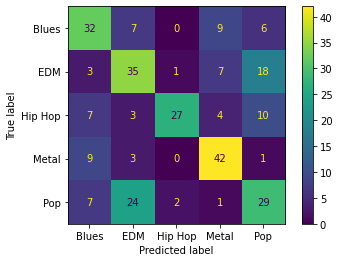

In [34]:
ConfusionMatrixDisplay(cm,display_labels=['Blues', 'EDM', 'Hip Hop', 'Metal', 'Pop']).plot()

In [66]:

chainsmokers.shape
drophot.shape

(660985,)

In [33]:
song_to_try_metal = song_extraction(q='the trooper iron maiden')
song_to_try_EDM = song_extraction(q='levels avicii')
song_to_try_pop = song_extraction(q='hit me baby one more time')
song_to_try_hiphop = song_extraction(q='straight outta compton')
song_to_try_blues = song_extraction(q='eric clapton')

ValueError: X.shape[1] = 259 should be equal to 5180, the number of features at training time

In [67]:
drophot = df[36,:]
chainsmokers = df[50,:]

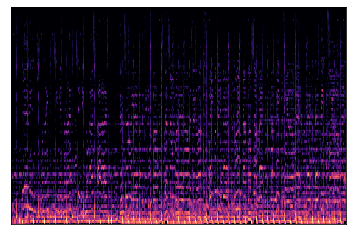

In [69]:
librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=chainsmokers,sr=22050),ref=np.max))

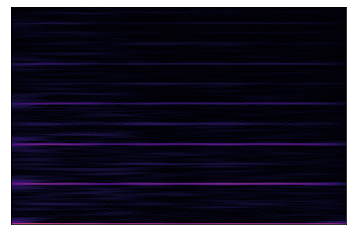

In [73]:
librosa.display.specshow(librosa.feature.fourier_tempogram(y=chainsmokers,sr=22050)+4)

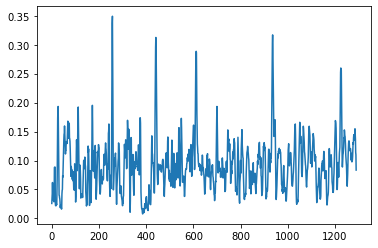

In [71]:
plt.plot(librosa.feature.zero_crossing_rate(y=chainsmokers).flatten())

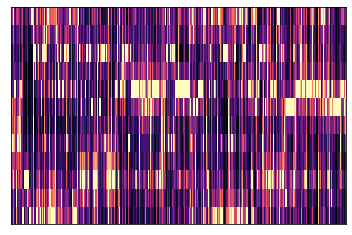

In [74]:
librosa.display.specshow(librosa.feature.chroma_stft(y=chainsmokers)-20)

,Unnamed: 0,id,name,artist,url,genre,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
50,50,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,The Chainsmokers,https://listen.hs.llnwd.net/g3/prvw/4/9/3/2/8/...,EDM,False,86,0.617,0.635,11,-6.769,0,0.0317,0.0498,0.000014,0.164,0.446,103.019


## CATBOOST

In [134]:
cb = CatBoostClassifier()
cb.fit([i.flatten() for i in mfcc_x_train], mel_y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.090894


CatBoostError: bad allocation

In [7]:
confusion_matrix(zcr_y_val,cb.predict([i.flatten() for i in zcr_x_val]).flatten())

array([[376, 184,  32, 383, 265],
       [306, 422, 114, 226, 289],
       [154, 236, 420,  25, 294],
       [305, 121,  70, 757, 136],
       [212, 431, 164,  57, 420]], dtype=int64)

In [8]:
accuracy_score(zcr_y_test,cb.predict([i.flatten() for i in zcr_x_test]).flatten())

0.4076655052264808

In [94]:
mapping

{'Hip hop': 0, 'EDM': 1, 'Pop': 2, 'Metal': 3, 'Blues': 4}

# Light GBM

## CNN

In [156]:
x_train_4d = np.stack(mfcc_x_train,axis=0)[...,np.newaxis]
x_val_4d = np.stack(mfcc_x_val, axis=0)[...,np.newaxis]
x_test_4d = np.stack(mfcc_x_test,axis=0)[...,np.newaxis]

good = ['good','f','mfccs','final_y','y_train','y_test','df','aug_x2','aug_y2','final_x','final_y','newxs','newys']
for name in dir():
    if not name.startswith('_'):
        if name not in good:
            del globals()[name]

In [158]:
input_shape = (x_train_4d.shape[1], x_train_4d.shape[2], x_train_4d.shape[3])

# 3 layer CNN
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape))
model.add(keras.layers.MaxPool2D((3,3), strides=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = input_shape))
model.add(keras.layers.MaxPool2D((3,3), strides=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(8, (2,2), activation='relu', input_shape = input_shape))
model.add(keras.layers.MaxPool2D((2,2), strides=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())

#flatten output
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))

#model.add(keras.layers.Dense(32, activation='relu'))

#output
model.add(keras.layers.Dense(5,activation='softmax'))


In [159]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

mapping = {'Hip hop':0, 'EDM':1, 'Pop':2, 'Metal':3, 'Blues':4}

model.fit(x_train_4d,pd.Series(stft_y_train).map(mapping), validation_data = (x_val_4d,pd.Series(stft_y_val).map(mapping)), batch_size=32, epochs=30)


Epoch 1/30
474/474 [==============================] - 55s 116ms/step - loss: 1.9386 - accuracy: 0.3105 - val_loss: 1.6129 - val_accuracy: 0.3579
Epoch 2/30
474/474 [==============================] - 56s 119ms/step - loss: 1.6381 - accuracy: 0.3779 - val_loss: 1.4971 - val_accuracy: 0.3883
Epoch 3/30
474/474 [==============================] - 55s 116ms/step - loss: 1.4775 - accuracy: 0.4188 - val_loss: 1.3797 - val_accuracy: 0.4423
Epoch 4/30
474/474 [==============================] - 56s 119ms/step - loss: 1.3435 - accuracy: 0.4573 - val_loss: 1.2996 - val_accuracy: 0.4674
Epoch 5/30
474/474 [==============================] - 58s 122ms/step - loss: 1.2340 - accuracy: 0.4994 - val_loss: 1.2440 - val_accuracy: 0.4918
Epoch 6/30
474/474 [==============================] - 55s 115ms/step - loss: 1.1677 - accuracy: 0.5227 - val_loss: 1.2077 - val_accuracy: 0.4996
Epoch 7/30
474/474 [==============================] - 55s 116ms/step - loss: 1.1045 - accuracy: 0.5441 - val_loss: 1.1810 - val_ac

In [168]:
test_error, test_accuracy = model.evaluate(x_test_4d,pd.Series(stft_y_test).map(mapping),verbose=1)


9/9 [==============================] - 0s 25ms/step - loss: 1.0940 - accuracy: 0.5889


In [62]:
cnn_melspectro_15k_preds = model.predict(x_test_4d)

In [63]:
cnn_melspectro_15k_preds.shape

(287, 5)

In [65]:
confusion_matrix(pd.Series(stft_y_test).map(mapping), np.argmax(cnn_melspectro_15k_preds,axis=1))

array([[37,  3,  3,  5,  3],
       [ 4, 23, 24,  5,  8],
       [11, 20, 23,  4,  5],
       [ 2,  6,  6, 31, 10],
       [ 1,  8,  8, 11, 26]], dtype=int64)

In [78]:
mapping

{'Hip hop': 0, 'EDM': 1, 'Pop': 2, 'Metal': 3, 'Blues': 4}

In [ ]:
# CNN: Using big augmented data lead to .5993 accuracy with melspectogram. Not very well-tuned model (55 completely from youtube video)
# CNN: Using 3sec slightly augmented lead to 0.53... up to 55 when using 100 epochs
# Big augmentation 3 sec still only 50%
# 10 sec clips, heavily augmented (smaller dataset than 5 sec clips): 47%

In [66]:
#model.save(r'augmented_data/keras_models/cnn_15k_chromastftZZZZ')

INFO:tensorflow:Assets written to: augmented_data/keras_models/cnn_15k_chromastft\assets


INFO:tensorflow:Assets written to: augmented_data/keras_models/cnn_15k_chromastft\assets


In [133]:
m_mel = librosa.feature.mfcc(y=song_to_try_metal.loc[0,'raw_array'],sr=22050).flatten()[:5180].reshape((1,5180))
e_mel = librosa.feature.mfcc(y=song_to_try_EDM.loc[0,'raw_array'],sr=22050).flatten()[:5180].reshape((1,5180))
p_mel = librosa.feature.mfcc(y=song_to_try_pop.loc[0,'raw_array'],sr=22050).flatten()[:5180].reshape((1,5180))
h_mel = librosa.feature.mfcc(y=song_to_try_hiphop.loc[0,'raw_array'],sr=22050).flatten()[:5180].reshape((1,5180))
b_mel = librosa.feature.mfcc(y=song_to_try_blues.loc[0,'raw_array'],sr=22050).flatten()[:5180].reshape((1,5180))



In [108]:
mel_cnn = keras.models.load_model(r'augmented_data\keras_models\cnn_15k_melspectro')

In [138]:
mfcc_svc.predict(b_mel)

array(['Hip hop'], dtype='<U7')

In [112]:
m_mel = m_mel[:,:259]

## RNN / LSTM

In [67]:
x_train_3d = np.stack(stft_x_train,axis=0)
x_val_3d = np.stack(stft_x_val, axis=0)
x_test_3d = np.stack(stft_x_test,axis=0)

input_shape_rnn = (x_train_3d.shape[1], x_train_3d.shape[2])

In [68]:
rnn = keras.Sequential()

# 2 LSTM layers
rnn.add(keras.layers.LSTM(64, input_shape = input_shape_rnn, return_sequences=True))
rnn.add(keras.layers.LSTM(64))

# Dense Layer
rnn.add(keras.layers.Dense(64, activation='relu'))
rnn.add(keras.layers.Dropout(0.3))

# output layer
rnn.add(keras.layers.Dense(5,activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
rnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
rnn.fit(x_train_3d,pd.Series(stft_y_train).map(mapping), validation_data = (x_val_3d,pd.Series(zcr_y_val).map(mapping)), epochs=100)

Epoch 1/100
474/474 [==============================] - 7s 10ms/step - loss: 1.5755 - accuracy: 0.2663 - val_loss: 1.5774 - val_accuracy: 0.2547
Epoch 2/100
474/474 [==============================] - 5s 11ms/step - loss: 1.5213 - accuracy: 0.3100 - val_loss: 1.5861 - val_accuracy: 0.2346
Epoch 3/100
474/474 [==============================] - 5s 11ms/step - loss: 1.4800 - accuracy: 0.3569 - val_loss: 1.5896 - val_accuracy: 0.2646
Epoch 4/100
474/474 [==============================] - 5s 11ms/step - loss: 1.4341 - accuracy: 0.3884 - val_loss: 1.6006 - val_accuracy: 0.2552
Epoch 5/100
474/474 [==============================] - 5s 11ms/step - loss: 1.3855 - accuracy: 0.4246 - val_loss: 1.6303 - val_accuracy: 0.2489
Epoch 6/100
161/474 [=========>....................] - ETA: 2s - loss: 1.3400 - accuracy: 0.4515

KeyboardInterrupt: 

In [22]:
rnn.evaluate(x_test_3d,pd.Series(zcr_y_test).map(mapping),verbose=1)
rnn.save(r'augmented_data/rnn_15k_chromastft')

9/9 [==============================] - 0s 2ms/step - loss: 1.5875 - accuracy: 0.3345


INFO:tensorflow:Assets written to: augmented_data/rnn_15k_zcr\assets


INFO:tensorflow:Assets written to: augmented_data/rnn_15k_zcr\assets


In [ ]:
# Got 40% with 15k dataset, super augmented.
# Got 34% with smaller dataset of 3 seconds, not very augmented.

In [80]:
cnn_15k_chromastft = keras.models.load_model(r'augmented_data/keras_models/cnn_15k_chromastft')
cnn_15k_melspectro = keras.models.load_model(r'augmented_data/keras_models/cnn_15k_melspectro')
mlp_15k_zcr = keras.models.load_model(r'augmented_data/keras_models/mlp_15k_zcr')
rnn_15k_zcr = keras.models.load_model(r'augmented_data/keras_models/rnn_15k_zcr')

In [106]:
cnn_stft_preds = cnn_15k_chromastft.predict(np.stack(stft_x_test,axis=0)[...,np.newaxis])
cnn_melspec_preds = cnn_15k_melspectro.predict(np.stack(mel_x_test,axis=0)[...,np.newaxis])
mlp_zcr_preds = mlp_15k_zcr.predict(np.stack(zcr_x_test,axis=0))[:,0,:]
rnn_zcr_preds = rnn_15k_zcr.predict(np.stack(zcr_x_test,axis=0))

In [100]:
score_1 = np.arange(0,1,.1)
score_2 = np.arange(0,1,.1)
score_3 = np.arange(0,1,.1)
score_4 = np.arange(0,1,.1)
score_card = []
for i in score_1:
    for j in score_2:
        for k in score_3:
            for l in score_4:
                a = accuracy_score(pd.Series(mel_y_test).map(mapping),np.argmax((i*cnn_stft_preds+j*cnn_melspec_preds+k*mlp_zcr_preds[:,0,:]+l*rnn_zcr_preds),axis=1))
                score_card.append((i,j,k,l,a))

In [103]:
pdd = pd.DataFrame(score_card)
pdd

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.177700
1,0.0,0.0,0.0,0.1,0.334495
2,0.0,0.0,0.0,0.2,0.334495
3,0.0,0.0,0.0,0.3,0.334495
4,0.0,0.0,0.0,0.4,0.334495
...,...,...,...,...,...
9995,0.9,0.9,0.9,0.5,0.588850
9996,0.9,0.9,0.9,0.6,0.585366
9997,0.9,0.9,0.9,0.7,0.581882
9998,0.9,0.9,0.9,0.8,0.585366


In [105]:
pdd[pdd.iloc[:,4]==pdd.iloc[:,4].max()]

,0,1,2,3,4
8716,0.8,0.7,0.1,0.6,0.627178
9817,0.9,0.8,0.1,0.7,0.627178


In [110]:


x_4d = np.stack([cnn_stft_preds,cnn_melspec_preds, mlp_zcr_preds, rnn_zcr_preds])[...,np.newaxis]
x_3d = np.stack([cnn_stft_preds,cnn_melspec_preds, mlp_zcr_preds, rnn_zcr_preds])

array([2, 1, 0, 4, 2, 4, 2, 1, 1, 1, 1, 1, 3, 4, 0, 2, 3, 4, 4, 1, 2, 0,
       1, 4, 3, 1, 2, 4, 2, 2, 2, 0, 2, 3, 2, 4, 1, 0, 4, 3, 3, 4, 2, 1,
       3, 3, 1, 3, 1, 1, 4, 3, 0, 3, 2, 0, 3, 3, 4, 2, 0, 2, 0, 2, 1, 2,
       4, 1, 0, 3, 0, 0, 2, 1, 3, 4, 4, 0, 0, 1, 2, 0, 0, 4, 1, 0, 1, 3,
       0, 2, 3, 4, 1, 4, 1, 0, 4, 1, 0, 1, 3, 4, 1, 1, 1, 2, 2, 1, 3, 4,
       1, 2, 0, 0, 3, 1, 2, 2, 1, 0, 1, 2, 0, 3, 1, 2, 2, 4, 2, 4, 1, 2,
       0, 2, 4, 3, 1, 0, 1, 1, 4, 1, 1, 1, 4, 3, 4, 3, 2, 2, 4, 3, 3, 2,
       4, 2, 4, 3, 3, 4, 0, 4, 1, 0, 2, 1, 3, 0, 2, 1, 2, 1, 1, 2, 3, 1,
       1, 4, 2, 3, 3, 3, 0, 1, 0, 2, 2, 3, 3, 1, 0, 4, 4, 1, 0, 2, 1, 2,
       4, 2, 4, 2, 2, 4, 4, 3, 0, 4, 3, 3, 3, 0, 4, 1, 1, 2, 0, 0, 2, 0,
       4, 1, 0, 4, 0, 3, 1, 3, 1, 1, 1, 0, 4, 1, 0, 2, 4, 2, 2, 1, 3, 0,
       0, 3, 2, 3, 0, 0, 2, 4, 1, 0, 2, 0, 0, 2, 3, 1, 0, 1, 3, 3, 2, 1,
       2, 1, 1, 0, 2, 1, 4, 4, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 3, 4, 1, 3,
       4], dtype=int64)

In [127]:
np.argmax(cnn_melspec_preds,axis=1)[pd.Series(mel_y_test).map(mapping).isin([0,3,4])]

array([0, 4, 4, 1, 1, 3, 4, 0, 3, 4, 4, 1, 2, 0, 4, 4, 0, 3, 4, 0, 4, 3,
       4, 2, 3, 3, 3, 1, 4, 3, 0, 3, 0, 3, 4, 0, 0, 4, 0, 3, 0, 3, 4, 4,
       0, 0, 1, 2, 0, 0, 3, 0, 3, 4, 1, 4, 4, 0, 3, 4, 2, 1, 3, 4, 2, 0,
       3, 0, 2, 0, 3, 2, 4, 2, 0, 2, 3, 0, 1, 4, 4, 3, 4, 3, 2, 4, 3, 3,
       2, 4, 3, 3, 0, 4, 0, 3, 0, 2, 2, 3, 1, 4, 2, 3, 3, 3, 0, 0, 3, 0,
       4, 0, 2, 1, 4, 2, 4, 4, 4, 3, 0, 4, 3, 3, 3, 0, 2, 0, 0, 0, 4, 0,
       4, 0, 3, 0, 4, 0, 4, 1, 3, 0, 0, 3, 2, 4, 1, 0, 0, 3, 0, 1, 3, 1,
       0, 0, 0, 3, 3, 4], dtype=int64)

In [167]:
confusion_matrix(pd.Series(mel_y_test).map(mapping)[pd.Series(mel_y_test).map(mapping).isin([0,3,4])],np.argmax(cnn_melspec_preds,axis=1)[pd.Series(mel_y_test).map(mapping).isin([0,3,4])])[[0,3,4],:][:,[0,3,4]]

array([[42,  1,  0],
       [ 3, 34, 12],
       [ 1,  7, 28]], dtype=int64)

In [81]:
km = KMeans(n_clusters=5)

In [85]:
km.fit([i.flatten() for i in mfcc_x_train])

KMeans(n_clusters=5)

In [86]:
labs = km.labels_

In [88]:
ccc = confusion_matrix(pd.Series(mfcc_y_train).map(mapping),labs)

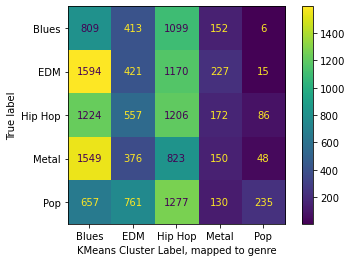

In [99]:
ConfusionMatrixDisplay(ccc,display_labels=['Blues', 'EDM', 'Hip Hop', 'Metal', 'Pop']).plot()
plt.xlabel('KMeans Cluster Label, mapped to genre')
plt.show()

In [90]:
from sklearn.metrics import plot_confusion_matrix

In [95]:
plot_confusion_matrix('KNN',pd.Series(mfcc_y_train).map(mapping),labs)

ValueError: plot_confusion_matrix only supports classifiers